## Nosakhare Edokpayi | S4214240

### CT7205: MACHINE LEARNING AND OPTIMISATION

### Medical Insurance


## Load packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## DATA IMPORTATION AND EXPLORATION

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
# view the first five rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,medicalCost
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# view the last five rows of the dataset
df.tail()

,age,sex,bmi,children,smoker,region,medicalCost
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
# view the number of rows and columns in the dataset
df.shape

(1338, 7)

In [6]:
# view the datatypes of the features
df.dtypes

age              int64
sex             object
bmi            float64
children         int64
smoker          object
region          object
medicalCost    float64
dtype: object

In [7]:
# view the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   medicalCost  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# check for unique values in each feature
df.nunique()

age              47
sex               2
bmi             548
children          6
smoker            2
region            4
medicalCost    1337
dtype: int64

In [9]:
# view the summary statistics of the dataset
df.describe().round(2)

,age,bmi,children,medicalCost
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


# DATA CLEANING

## rename columns

In [10]:
# rename the columns medicalCost to medical_cost
df.rename(columns={'medicalCost':'medical_cost', 'sex':'gender'}, inplace=True)

df_renamed = df
df.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'medical_cost'], dtype='object')

Column names were changed for clarity and standardisation. "medicalCost" became "medical_cost," "sex" was renamed to "gender," and "smoker" became "smoking_status." These changes improve dataset readability and follow consistent naming conventions for better communication and analysis.

## missing values

In [11]:
df = df_renamed

# check for missing values
df.isnull().sum()

age             0
gender          0
bmi             0
children        0
smoker          0
region          0
medical_cost    0
dtype: int64

There are no missing or NA values

## duplicate  data

- first we check if there are any duplicate rows in the  data frame.

In [12]:
# check for duplicates
df.duplicated().sum()

1

We find that there is one duplicate row. 
- Next, we will inspect the duplicate row fursther to determine if it is a true duplicate

In [13]:
# view all occurences of the duplicate row
df[df.duplicated(keep=False)]

,age,gender,bmi,children,smoker,region,medical_cost
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631



Based on the information provided in the dataset and the absence of unique identifier attributes like "patient name" or "patient ID", we cannot be 100% certain that the duplicate row represents a different individual of matching records for the variables or the same individual with repeated entries. Having this limitation, the best approach to handling the duplicate row is to assume it is true and drop it. 

Dropping it would help to prevent the potential bias its existence contributed by removing the extra weight and influence of the duplicated values. It would also help to reduce overfitting the model by ensuring that the importance of certain characteristics is not inflated and that the results are not skewed.



- drop duplicates

In [14]:
# drop duplicates
df.drop_duplicates(inplace=True)


check to ensure the duplicate has been dropped

In [15]:
df.duplicated().sum()

0

---

# Tasks #
## (a) 
#### 1. Is the required ML supervised, unsupervised, or semi supervised learning and why? 
#### 2. Which ML task (classification, clustering, regression analysis or any other) is the best in this case and why?

## Answer:
    1. The required ML task is supervised learning because the goal of the task is to build a prediction model to estimate the medical cost of individuals based on given predictors. The dataset contains labeled examples with the target variable ("medicalCost") provided. 
    
    2. The ML task for this problem is regression analysis since we aim to predict a continuous numerical value (the medical cost).

# (b) EXPLORATORY DATA ANALYSIS

#### descriptive statistics of data

In [16]:
df_explore = df

descriptive_stats = df_explore.describe()

# View the descriptive statistics
descriptive_stats

,age,bmi,children,medical_cost
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010



#### We will visualise all the features in the dataset to gain insights and documents observations about each feature.

#### 'age' distribution

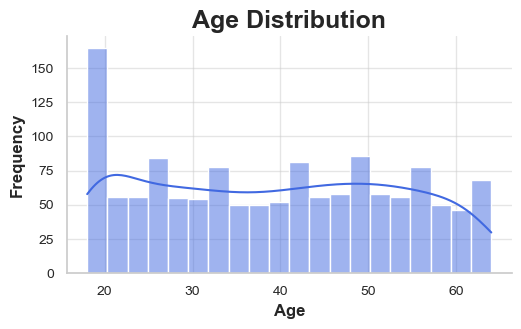

In [17]:
# Create a new figure and adjust the style
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(df_explore['age'], bins=20, kde=True, color='royalblue')
plt.title("Age Distribution", fontsize=18, fontweight='bold')
plt.xlabel("Age", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12,  fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, alpha=0.5)

# Remove the top and right spines
sns.despine()

# Adjust the layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### 'bmi' distribution

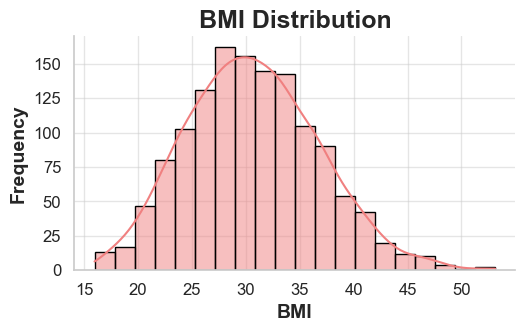

In [18]:
# Create a new figure and adjust the style
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

# BMI distribution
plt.subplot(2, 2, 2)
sns.histplot(df_explore['bmi'], bins=20, kde=True, color='lightcoral', edgecolor='black')
plt.title("BMI Distribution", fontsize=18, fontweight='bold')
plt.xlabel("BMI", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.5)

# Remove the top and right spines
sns.despine()

# Adjust the layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### 'children' distribution

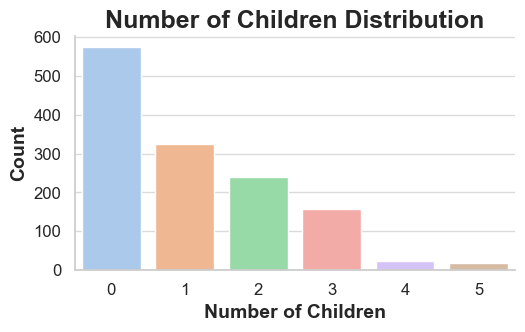

In [19]:
# Create a new figure and adjust the style
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

# Number of children distribution
plt.subplot(2, 2, 3)
sns.countplot(data=df_explore, x='children', palette='pastel')
plt.title("Number of Children Distribution", fontsize=18, fontweight='bold')
plt.xlabel("Number of Children", fontsize=14, fontweight='bold')
plt.ylabel("Count", fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.7)

# Remove the top and right spines
sns.despine()

# Adjust the layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


#### 'smoker' distribution

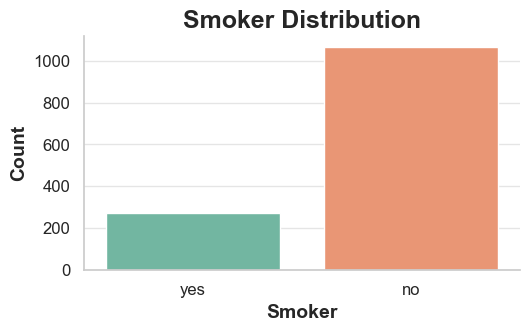

In [20]:
# Create a new figure and adjust the style
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

plt.subplot(2, 2, 4)
sns.countplot(data=df_explore, x='smoker', palette='Set2')
plt.title("Smoker Distribution", fontsize=18, fontweight='bold')
plt.xlabel("Smoker", fontsize=14, fontweight='bold')
plt.ylabel("Count", fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.5)

# Remove the top and right spines
sns.despine()

# Adjust the layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


#### 'gender' distribution

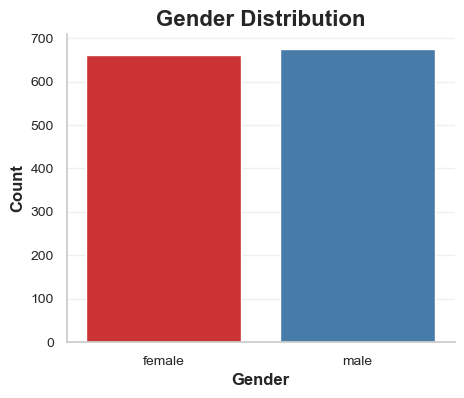

In [21]:
# Create a new figure and adjust the style
plt.figure(figsize=(5, 4))
sns.set(style='whitegrid')

sns.countplot(data=df_explore, x='gender', palette='Set1')
plt.title("Gender Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Gender", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()


#### 'region' distribution

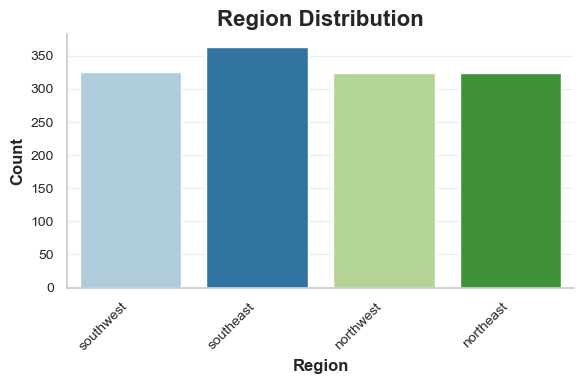

In [22]:
# Create a new figure and adjust the style
plt.figure(figsize=(6, 4))
sns.set(style='whitegrid')
# scale elements of the figure to suite jupyter notbooks
sns.set_context("notebook")

sns.countplot(data=df_explore, x='region', palette='Paired')
plt.title("Region Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Region", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


#### 'medical_cost' distribution

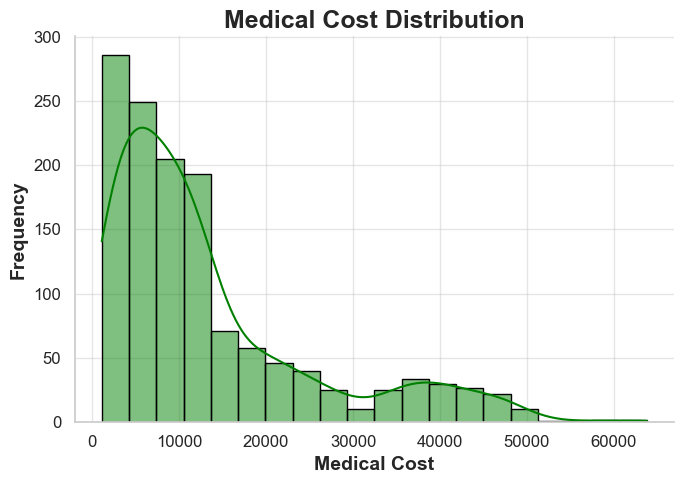

In [23]:
# Create a new figure and adjust the style
plt.figure(figsize=(7, 5))
sns.set(style='whitegrid')

sns.histplot(df_explore['medical_cost'], bins=20, kde=True, color='green', edgecolor='black')
plt.title("Medical Cost Distribution", fontsize=18, fontweight='bold')
plt.xlabel("Medical Cost", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.5)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


##### medical costs based on 'age' categories #####

In [24]:
# Calculate statistics for medical costs based on 'age' categories
statistics_by_age = df_explore.groupby('age')['medical_cost'].agg(['mean', 'median', 'min', 'max', 'std', 'count']).sort_values(by='age')

# Display the statistics for medical costs based on age
statistics_by_age

,mean,median,min,max,std,count
age,,,,,,
18,7086.217556,2198.189850,1121.87390,38792.68560,10198.459989,69
19,9868.929428,2136.882250,1241.56500,39722.74620,12523.348425,67
20,10159.697736,2459.720100,1391.52870,38344.56600,12049.624794,29
21,4730.464330,2254.423600,1515.34490,26018.95052,6168.059334,28
22,10012.932802,2641.155700,1664.99960,44501.39820,14653.363670,28
23,12419.820040,3594.538000,1815.87590,40904.19950,13421.332226,28
24,10648.015962,3045.137650,1969.61400,38126.24650,12203.650633,28
25,9838.365311,3750.148925,2137.65360,42112.23560,11551.289468,28
26,6133.825309,3388.882175,2302.30000,36085.21900,7765.729490,28


##### Visualise average medical costs based on age categories #####

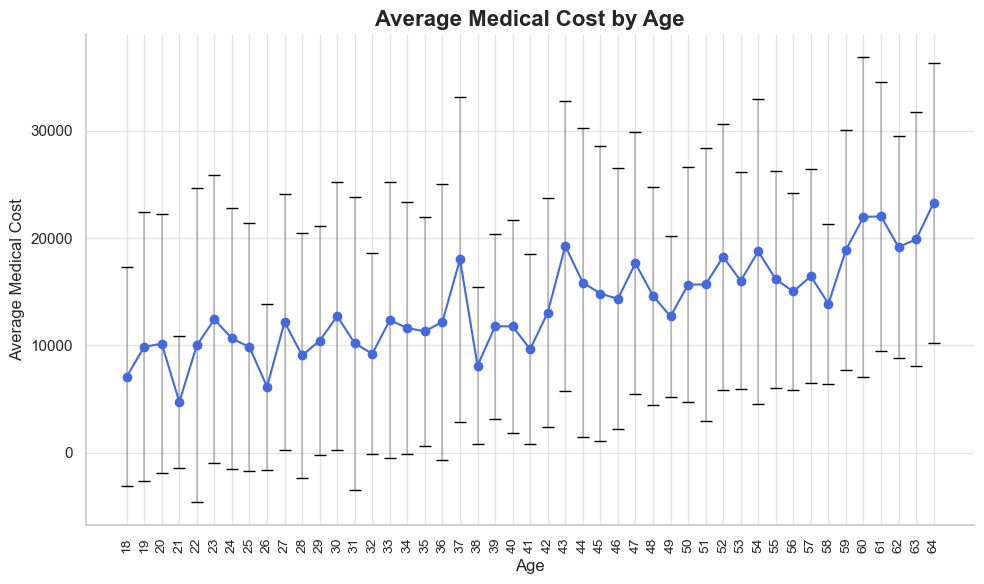

In [25]:
# Create a new figure with a specific size
plt.figure(figsize=(10, 6))

# Plot the data points with error bars representing the standard deviation
# 'o' specifies the marker style, '-' sets the linestyle, and 'royalblue' is the color of the data points
# 'gray' is the color of the error bars
# elinewidth=1 sets the width of the error bars, capsize=3 adjusts the size of the caps at the end of the error bars
plt.errorbar(statistics_by_age.index, statistics_by_age['mean'],
             yerr=statistics_by_age['std'], fmt='o', linestyle='-', color='royalblue',
             ecolor='black', elinewidth=0.3, capsize=4)

# Add labels to the x and y-axes
plt.xlabel('Age')
plt.ylabel('Average Medical Cost')

# Add a title to the plot
plt.title('Average Medical Cost by Age', fontsize=16, fontweight='bold')

# Set the x-axis tick labels, rotating them by 90 degrees for better readability
plt.xticks(statistics_by_age.index, fontsize=10, rotation=90)

# Add grid lines to the plot for better visualization of the data points
plt.grid(alpha=0.5)

# Adjust the layout for a better presentation
plt.tight_layout()

# Remove the top and right spines
sns.despine()

# Display the plot
plt.show()

The analysis of medical costs based on age reveals important patterns and trends related to healthcare expenses.

There is a clear increasing trend in medical costs as age advances, indicating that older individuals tend to have higher healthcare expenses compared to younger ones. However, within the age range of 37 to 39, fluctuations in average expenses are observed.
At age 37, the average medical cost is relatively high at approximately **18,019**, with a significant variation in expenses ranging from **4,646** to **46,113** within this age group. Age 38 shows a notable decline in average medical costs to around **8,103**, but the variability remains evident, with expenses ranging from **5,384** to **41,949**. At age 39, the average medical cost increases to approximately **11,778**, and like other age groups, there is considerable variation in costs, ranging from **5,650** to **40,103**.

Additionally, the plot highlights a peak in average medical costs around the ages of 60 to 64, indicating that this age group incurs the highest healthcare expenses compared to other age groups. Moreover, there is a noticeable and steep increase in average medical costs beyond the age of 50, suggesting a significant rise in healthcare expenses in the later stages of life.

##### Medical Cost by gender #####

In [26]:
# Calculate statistics for medical_cost based on 'gender' categories
statistics_by_gender = df_explore.groupby('gender')['medical_cost'].agg(['mean', 'median', 'min', 'max', 'std', 'count'])
statistics_by_gender

,mean,median,min,max,std,count
gender,,,,,,
female,12569.578844,9412.9625,1607.5101,63770.42801,11128.703801,662
male,13974.998864,9377.9047,1121.8739,62592.87309,12971.958663,675


visualise average medical cost by gender

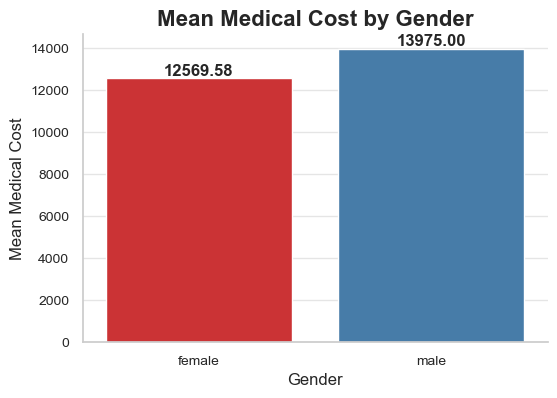

In [27]:
# Create a new figure with a specific size
plt.figure(figsize=(6, 4))
sns.barplot(x=statistics_by_gender.index, y='mean', data=statistics_by_gender, palette='Set1')

# Add value labels above each bar
for index, value in enumerate(statistics_by_gender['mean']):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.xlabel('Gender', fontsize=12)
plt.ylabel('Mean Medical Cost', fontsize=12)
plt.title('Mean Medical Cost by Gender', fontsize=16, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.5)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()


Based on the results above. We find that;
On average, males exhibit slightly higher medical costs (**13,974.99**) compared to females (**12,569.58**). This discrepancy underscores the significance of considering gender-specific healthcare expenses when formulating insurance premiums and allocating healthcare resources.

Additionally, both genders display notable variability in medical costs, evident from the standard deviations: **11,128.70** for females and **12,971.96** for males. This wide range indicates diverse healthcare needs within each gender category, necessitating flexible and tailored healthcare plans to accommodate individual variations.

The presence of outliers further emphasizes the need for in-depth analysis. The minimum and maximum medical costs vary significantly for both genders, with females experiencing costs ranging from **1,607.51** to **63,770.43**, and males from **1,121.87** to **62,592.87**. These extreme values may signal unique medical conditions or high-intensity treatments that should be thoroughly considered in healthcare coverage and policy evaluations.

Also, we note that the study benefits from a substantial and balanced sample size of **662** for females and **675** for males. This balanced representation facilitates accurate statistical analysis and contributes to providing a comprehensive understanding of gender-specific healthcare trends.

In [28]:
##### Medical Cost by BMI #####

In [29]:
# Calculate statistics for medical_cost based on 'bmi' categories
statistics_by_bmi = df_explore.groupby('bmi')['medical_cost'].agg(['mean', 'median', 'min', 'max', 'std', 'count']).sort_values(by='bmi')
statistics_by_bmi

,mean,median,min,max,std,count
bmi,,,,,,
15.960,1694.796400,1694.79640,1694.79640,1694.79640,NaN,1
16.815,4904.000350,4904.00035,3167.45585,6640.54485,2455.844784,2
17.195,14455.644050,14455.64405,14455.64405,14455.64405,NaN,1
17.290,7813.353433,6877.98010,3732.62510,12829.45510,4619.986089,3
17.385,2775.192150,2775.19215,2775.19215,2775.19215,NaN,1
...,...,...,...,...,...,...
48.070,9432.925300,9432.92530,9432.92530,9432.92530,NaN,1
49.060,11381.325400,11381.32540,11381.32540,11381.32540,NaN,1
50.380,2438.055200,2438.05520,2438.05520,2438.05520,NaN,1


From our analysis, two significant issues have emerged:

**NaN Values:** The standard deviation (std) column shows NaN (Not a Number) for many BMI categories. This occurs when there is only one data point (single observation) within a specific BMI category, making it impossible to calculate the standard deviation with just one value. Consequently, the standard deviation remains undefined or not available for such cases, limiting the accuracy of our statistical insights.

**Limited Variation:** The provided statistics reveal that there is limited variation in the medical costs within each BMI category. For instance, some BMI categories have identical values for mean, median, minimum, and maximum, suggesting a lack of diversity in the feature values.

To extract more meaningful information from the BMI data, we should consider applying feature engineering techniques and grouping BMI values into broader categories. By doing so, we can create more balanced and informative BMI groups, ensuring an adequate number of observations in each group. This approach will not only address the issue of NaN values but also provide a clearer understanding of how medical costs relate to different BMI ranges.

##### Medical Cost by Smoker #####

In [30]:
# Calculate statistics for medical_cost based on 'smoker' categories
statistics_by_smoker = df_explore.groupby('smoker')['medical_cost'].agg(['mean', 'median', 'min', 'max', 'std', 'count'])
statistics_by_smoker

,mean,median,min,max,std,count
smoker,,,,,,
no,8440.660307,7345.72660,1121.8739,36910.60803,5992.973800,1063
yes,32050.231832,34456.34845,12829.4551,63770.42801,11541.547176,274


Visualise average medical cost by smoker categories

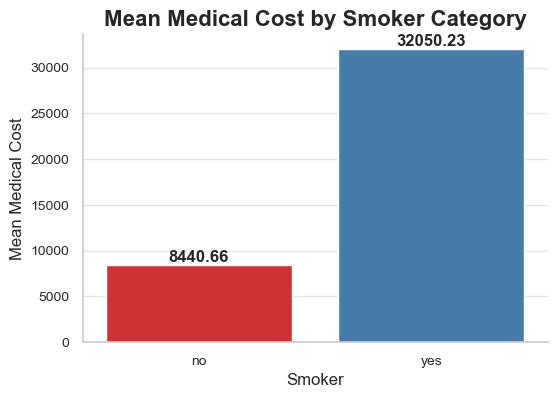

In [31]:
plt.figure(figsize=(6, 4))
sns.barplot(x=statistics_by_smoker.index, y='mean', data=statistics_by_smoker, palette='Set1')

# Add value labels above each bar
for index, value in enumerate(statistics_by_smoker['mean']):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.xlabel('Smoker', fontsize=12)
plt.ylabel('Mean Medical Cost', fontsize=12)
plt.title('Mean Medical Cost by Smoker Category', fontsize=16, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.5)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

The statistics for medical costs based on _'smoker'_ categories in the dataset reveal significant differences between non-smokers and smokers. 

Non-smokers have an average medical cost of approximately **8,440.66**, while smokers incur much higher costs with an average of approximately **32,050.23**. The median medical cost for non-smokers is around **7,345.73**, whereas for smokers, it is approximately **34,456.35**, indicating some high-cost cases among smokers. 

We also see that, non-smokers have a minimum medical cost of approximately **1,121.87** and a maximum of around **36,910.61**. 
For smokers, the minimum medical cost is approximately **12,829.46**, and the maximum is approximately **63,770.43**, indicating a wider range of costs for smokers. Smokers' medical costs also have a higher standard deviation of approximately **11,541.55** compared to non-smokers' **5,992.97**. 

These insights highlight the substantial impact of smoking on healthcare expenses, which can be crucial for insurers, healthcare providers, and policymakers in formulating appropriate strategies and policies.

##### Medical Cost by Region #####

In [32]:
# statistics for medical_cost based on 'region' categories
statistics_by_region = df_explore.groupby('region')['medical_cost'].agg(['mean', 'median', 'min', 'max', 'std', 'count']).sort_values(by='mean', ascending=False)
statistics_by_region

,mean,median,min,max,std,count
region,,,,,,
southeast,14735.411438,9294.131950,1121.8739,63770.42801,13971.098589,364
northeast,13406.384516,10057.652025,1694.7964,58571.07448,11255.803066,324
northwest,12450.840844,8976.977250,1621.3402,60021.39897,11073.125699,324
southwest,12346.937377,8798.593000,1241.5650,52590.82939,11557.179101,325


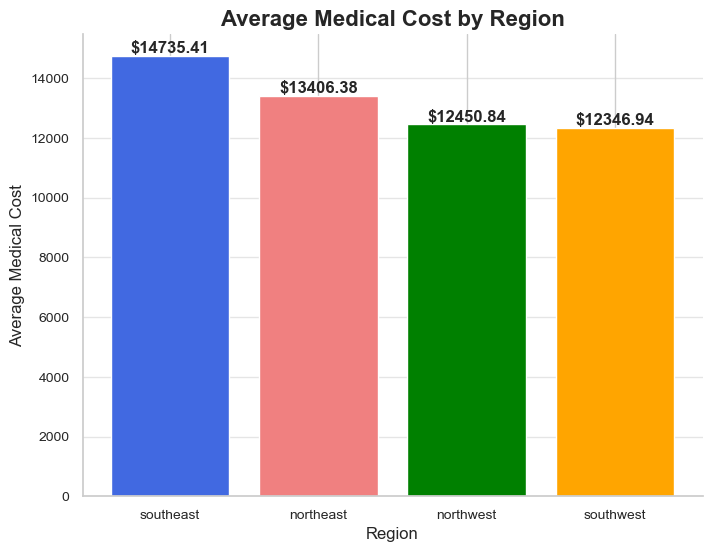

In [33]:
# Create a new figure with a specific size
plt.figure(figsize=(8, 6))

# Choose custom colors for each region
colors = ['royalblue', 'lightcoral', 'green', 'orange']

# Create the bar plot with custom colors
plt.bar(statistics_by_region.index, statistics_by_region['mean'], color=colors)

# Add value labels above each bar
for index, value in enumerate(statistics_by_region['mean']):
    plt.text(index, value, f"${value:.2f}", ha='center', va='bottom', fontweight='bold', fontsize=12)

# Add labels and title
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Medical Cost', fontsize=12)
plt.title('Average Medical Cost by Region', fontsize=16, fontweight='bold')

# Customize font size for x and y axis ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.5)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

 The average medical costs for each region in the US revealed regional variations in healthcare expenses. 
 The Southeast region showed the highest average medical cost at **14,735.41**, while the Northwest and Southwest regions had lower costs of **12,450.84** and **12,346.94**, respectively. The Northeast region fell in between with an average cost of **13,406.38**

## Categorical encoding

To better prepare the data for correlational analysis and model development, we will encode the categorical features (gender, smoker and region) using  two different approaches.
- Binary encoding
- One-hot encoding



#### Binary encoding

For the **"gender"** and **"smoker"** features which contain only two categories in their distribution, we will apply binary encoding.

Using binary encoding instead of one-hot encoding for the **"smoker"** and **"gender"** features is crucial to maintain interpretability and mitigate multicollinearity issues (a situation where two or more independent features are highly correlated with each other), leading to instability and inflated coefficients in regression models.

By employing binary encoding, we represent the categorical variables **"smoker"** and **"gender"** as binary values (e.g., 0 for _"no"_ and 1 for _"yes"_ or 0 for _"male"_ and 1 for _"female"_). This approach avoids the creation of additional dummy variables (e.g., "smoker_yes" and "smoker_no" or _"gender_female"_ and _"gender_male"_), which could introduce multicollinearity problems.

Maintaining interpretability is vital in this context as it allows us to understand the impact of each predictor (e.g., smoking status and gender) on the target variable (medical costs) more clearly. Binary encoding ensures that each feature represents a distinct and independent effect, making it easier to interpret the regression coefficients and draw meaningful conclusions from the model's output.

In [34]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['gender'] = df['gender'].map({'male': 1, 'female': 0})

df.head(10)

,age,gender,bmi,children,smoker,region,medical_cost
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
5,31,0,25.740,0,0,southeast,3756.62160
6,46,0,33.440,1,0,southeast,8240.58960
7,37,0,27.740,3,0,northwest,7281.50560
8,37,1,29.830,2,0,northeast,6406.41070
9,60,0,25.840,0,0,northwest,28923.13692


#### One-hot Encoding

On the other hand, for the **"region"** feature with four unique categories (_'southwest'_, _'southeast'_, _'northwest'_, and _'northeast'_), one-hot encoding is the most appropriate method to handle its multiple categories effectively and avoid unintended assumptions or biases in the data.

One-hot encoding transforms the **"region"** feature into four binary columns, each representing one of the regions. For each individual, the corresponding region column will have a value of 1, indicating the individual's residential area, while the other region columns will have values of 0.

During the modelling process, any potential multicollinearity issues that may arise due to one-hot encoding can be addressed through feature selection or regularisation techniques.

In [35]:
# Perform one-hot encoding on the 'region' column
df_encoded = pd.get_dummies(df, columns=["region"])

df_encoded.head()

,age,gender,bmi,children,smoker,medical_cost,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


#### move medical_cost feature to the last column

In [36]:
df = df_encoded

# move the medical_cost column to the end of the df dataframe
df['medical_cost'] = df.pop('medical_cost')

df.head()


,age,gender,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,medical_cost
0,19,0,27.900,0,1,0,0,0,1,16884.92400
1,18,1,33.770,1,0,0,0,1,0,1725.55230
2,28,1,33.000,3,0,0,0,1,0,4449.46200
3,33,1,22.705,0,0,0,1,0,0,21984.47061
4,32,1,28.880,0,0,0,1,0,0,3866.85520


# Correlation analysis
#### Pearson correlation

In [37]:
df_corr = df_explore

# correlation matrix
correlation_matrix = df_corr.corr(numeric_only=True)
correlation_matrix

,age,gender,bmi,children,smoker,medical_cost
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.298308
gender,-0.019814,1.000000,0.046397,0.017848,0.076596,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,0.787234
medical_cost,0.298308,0.058044,0.198401,0.067389,0.787234,1.000000


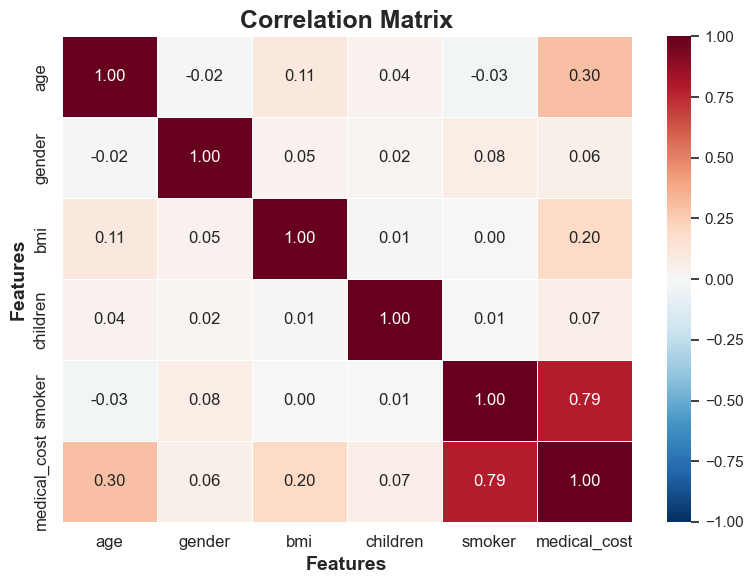

In [38]:
# Create a new figure and adjust the style
plt.figure(figsize=(8, 6))
sns.set(style='white')

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix", fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Features", fontsize=14, fontweight='bold')
plt.ylabel("Features", fontsize=14, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

#### Spearman correlation

In [39]:
corr_matrix_spearman = df_corr.corr(method='spearman', numeric_only=True)
corr_matrix_spearman

,age,gender,bmi,children,smoker,medical_cost
age,1.000000,-0.019748,0.107897,0.055813,-0.025798,0.533523
gender,-0.019748,1.000000,0.044777,0.016372,0.076596,0.010748
bmi,0.107897,0.044777,1.000000,0.015643,0.002216,0.119585
children,0.055813,0.016372,0.015643,1.000000,0.016199,0.132200
smoker,-0.025798,0.076596,0.002216,0.016199,1.000000,0.663611
medical_cost,0.533523,0.010748,0.119585,0.132200,0.663611,1.000000


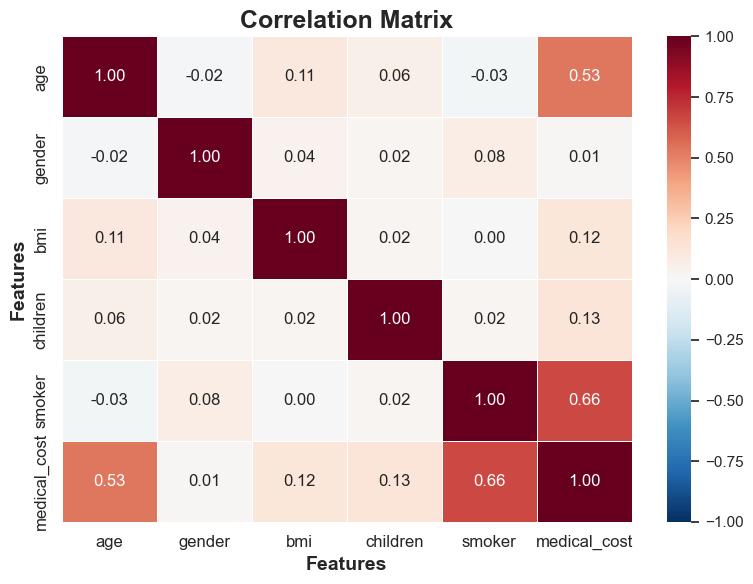

In [40]:
# Create a new figure and adjust the style
plt.figure(figsize=(8, 6))
sns.set(style='white')

# Visualize the correlation matrix
sns.heatmap(corr_matrix_spearman, annot=True, cmap='RdBu_r', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix", fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Features", fontsize=14, fontweight='bold')
plt.ylabel("Features", fontsize=14, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


Based on the results of both correlation methods (Pearson and Spearman), we observed that the 'smoker' feature exhibited a strong positive correlation with 'medical_cost' (around 0.787234 using Pearson and 0.663611 using Spearman). This finding indicates that being a smoker is significantly associated with higher medical costs. In contrast, the correlations between the other numerical predictors (age, bmi, children) and 'medical_cost' were relatively moderate (around 0.298 for age using Pearson and 0.533 for age using Spearman) and relatively low for bmi and children.

However, despite the strong correlation for 'smoker', it is important to note that the overall correlation coefficients are not extremely high, suggesting that there may be other complex relationships and interactions that are not fully captured by the simple linear correlations. This underscores the importance of feature engineering to uncover more nuanced patterns and improve the model's performance.


# Feature Engineering ##

In [41]:
df = df_corr

# Define BMI category ranges
underweight_range = (0, 18.5)
normal_weight_range = (18.5, 24.9)
overweight_range = (25, 29.9)
obese_range = (30, float('inf'))

# Create a function to assign BMI category based on BMI value
def get_bmi_category(bmi):
    if bmi < underweight_range[1]:
        return 'underweight'
    elif bmi < normal_weight_range[1]:
        return 'normal weight'
    elif bmi < overweight_range[1]:
        return 'overweight'
    else:
        return 'obese'


# Apply the function to create the "bmi_category" feature
df['bmi_category'] = df['bmi'].apply(get_bmi_category)

# move medical_cost column to the end of the df dataframe
df['medical_cost'] = df.pop('medical_cost')

# copy the df dataframe to a new dataframe
df_feng = df

# View the updated DataFrame with the new "bmi_category" features
print(df_feng.head())

   age  gender     bmi  children  smoker     region   bmi_category  \
0   19       0  27.900         0       1  southwest     overweight   
1   18       1  33.770         1       0  southeast          obese   
2   28       1  33.000         3       0  southeast          obese   
3   33       1  22.705         0       0  northwest  normal weight   
4   32       1  28.880         0       0  northwest     overweight   

   medical_cost  
0   16884.92400  
1    1725.55230  
2    4449.46200  
3   21984.47061  
4    3866.85520  


#### Medical Cost by BMI Category ####

In [42]:
# Calculate statistics for medical_cost based on 'bmi_category' categories
statistics_by_bmi_category = df_feng.groupby('bmi_category')['medical_cost'].agg(['mean', 'median', 'min', 'max', 'std', 'count']).sort_values(by='mean', ascending=False)
statistics_by_bmi_category

,mean,median,min,max,std,count
bmi_category,,,,,,
obese,15479.745716,9895.213925,1131.5066,63770.42801,14486.984471,718
overweight,11030.331700,8703.456000,1252.4070,38245.59327,8030.463153,377
normal weight,10379.499732,8604.153525,1121.8739,35069.37452,7500.713471,222
underweight,8852.200585,6759.262475,1621.3402,32734.18630,7735.038364,20


##### visualising the relationship between bmi_category and medical_cost #####

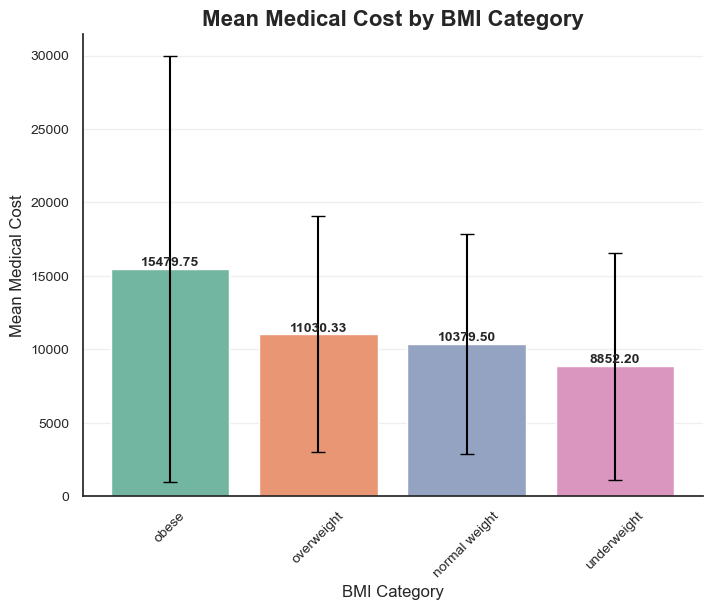

In [43]:
plt.figure(figsize=(8, 6))
sns.barplot(x=statistics_by_bmi_category.index, y='mean', data=statistics_by_bmi_category, palette='Set2')

# Add error bars representing standard deviation
for index, row in statistics_by_bmi_category.iterrows():
    plt.errorbar(index, row['mean'], yerr=row['std'], color='black', capsize=5)

# Add value labels above each bar
for index, value in enumerate(statistics_by_bmi_category['mean']):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Mean Medical Cost', fontsize=12)
plt.title('Mean Medical Cost by BMI Category', fontsize=16, fontweight='bold')
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

After applying feature engineering and grouping the BMI values into broader categories, we obtained more insightful statistics for medical costs based on 'bmi_category'. Here are the key findings:

**Obese:** The 'obese' category shows the highest average medical cost, with an average of **15,479.75**. This suggests that individuals classified as obese tend to have higher healthcare expenses compared to other BMI categories. The medical costs within this category exhibit significant variation, as indicated by a relatively high standard deviation of **14,486.98**. The category consists of **718** observations.

**Overweight:** The 'overweight' category follows the 'obese' category in terms of average medical costs, with an average of **11,030.33**. While the average medical cost is lower than that of the 'obese' category, it is still higher than the remaining BMI categories. The standard deviation is **8,030.46**, indicating moderate variability in medical expenses within this category. The category consists of **377** observations.

**Normal Weight:** The 'normal weight' category shows an average medical cost of **10,379.50**. This category represents individuals with a BMI considered within the normal weight range. The standard deviation of **7,500.71** suggests relatively moderate variation in medical costs within this group. The category consists of **222** observations.

**Underweight:** The 'underweight' category has the lowest average medical cost at **8,852.20**. Individuals classified as underweight have the lowest healthcare expenses on average compared to other BMI categories. However, this category has a relatively small sample size of only **20** observations, which may limit the generalizability of the results.

#### BMI integer encoding ####

In [44]:
df_feng_encoded = df_feng

# Define the binary encoding dictionary for 'bmi_category'
binary_encoding_dict = {
    'underweight': '00',
    'normal weight': '01',
    'overweight': '10',
    'obese': '11'
}

# Map the 'bmi_category' to its binary representation using the dictionary
df_feng_encoded['bmi_category_binary'] = df_feng_encoded['bmi_category'].map(binary_encoding_dict).astype(int)

# Drop the original 'bmi_category' column as it's no longer needed
# df_feng.drop('bmi_category', axis=1, inplace=True)

# move tthe medical_cost column to the end of the df dataframe
df_feng_encoded['medical_cost'] = df_feng_encoded.pop('medical_cost')

# View the updated DataFrame with the binary-encoded 'bmi_category_binary' feature
print(df_feng_encoded.head())

   age  gender     bmi  children  smoker     region   bmi_category  \
0   19       0  27.900         0       1  southwest     overweight   
1   18       1  33.770         1       0  southeast          obese   
2   28       1  33.000         3       0  southeast          obese   
3   33       1  22.705         0       0  northwest  normal weight   
4   32       1  28.880         0       0  northwest     overweight   

   bmi_category_binary  medical_cost  
0                   10   16884.92400  
1                   11    1725.55230  
2                   11    4449.46200  
3                    1   21984.47061  
4                   10    3866.85520  


The combination of Binary Encoding and Integer Encoding allows us to efficiently represent the ordinal nature of the BMI categories with a reduced number of features. Instead of one-hot encoding, which would create multiple binary features for each category, this approach uses a compact representation of the ordinal information.

#### Pearson Correlation ####

In [45]:
df_feng_encoded

# correlation matrix
corr_matrix_pears = df_feng_encoded.corr(numeric_only=True)
print(corr_matrix_pears)

                          age    gender       bmi  children    smoker  \
age                  1.000000 -0.019814  0.109344  0.041536 -0.025587   
gender              -0.019814  1.000000  0.046397  0.017848  0.076596   
bmi                  0.109344  0.046397  1.000000  0.012755  0.003746   
children             0.041536  0.017848  0.012755  1.000000  0.007331   
smoker              -0.025587  0.076596  0.003746  0.007331  1.000000   
bmi_category_binary  0.100993  0.034942  0.714845 -0.004489 -0.024386   
medical_cost         0.298308  0.058044  0.198401  0.067389  0.787234   

                     bmi_category_binary  medical_cost  
age                             0.100993      0.298308  
gender                          0.034942      0.058044  
bmi                             0.714845      0.198401  
children                       -0.004489      0.067389  
smoker                         -0.024386      0.787234  
bmi_category_binary             1.000000      0.135139  
medical_cost    

Visuialise matrix

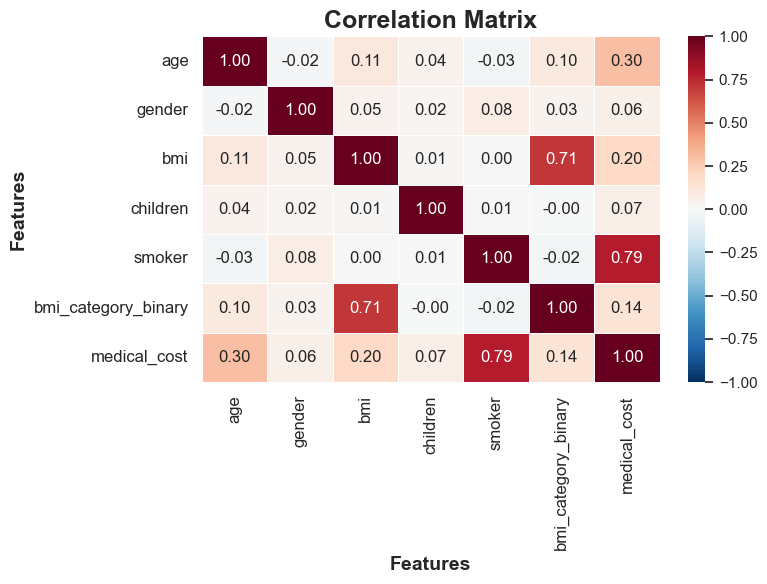

In [46]:
# Create a new figure and adjust the style
plt.figure(figsize=(8, 6))
sns.set(style='white')

# Visualize the correlation matrix
sns.heatmap(corr_matrix_pears, annot=True, cmap='RdBu_r', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix", fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Features", fontsize=14, fontweight='bold')
plt.ylabel("Features", fontsize=14, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

#### Spearman correlation ####

In [47]:
corr_matrix_spear = df_feng_encoded.corr(method='spearman', numeric_only=True)
print(corr_matrix_spear)

                          age    gender       bmi  children    smoker  \
age                  1.000000 -0.019748  0.107897  0.055813 -0.025798   
gender              -0.019748  1.000000  0.044777  0.016372  0.076596   
bmi                  0.107897  0.044777  1.000000  0.015643  0.002216   
children             0.055813  0.016372  0.015643  1.000000  0.016199   
smoker              -0.025798  0.076596  0.002216  0.016199  1.000000   
bmi_category_binary  0.102053  0.040930  0.904507  0.011708 -0.009591   
medical_cost         0.533523  0.010748  0.119585  0.132200  0.663611   

                     bmi_category_binary  medical_cost  
age                             0.102053      0.533523  
gender                          0.040930      0.010748  
bmi                             0.904507      0.119585  
children                        0.011708      0.132200  
smoker                         -0.009591      0.663611  
bmi_category_binary             1.000000      0.107874  
medical_cost    

Visualise matrix

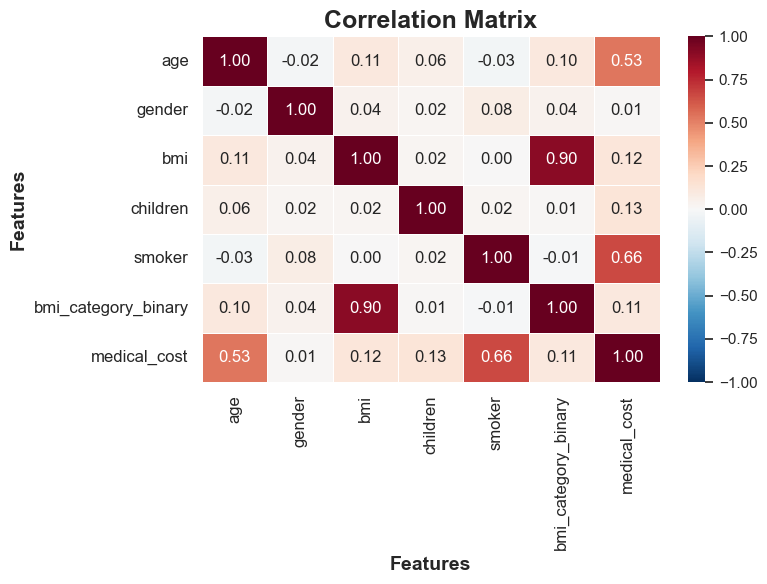

In [48]:

# Create a new figure and adjust the style
plt.figure(figsize=(8, 6))
sns.set(style='white')

# Visualize the correlation matrix
sns.heatmap(corr_matrix_spear, annot=True, cmap='RdBu_r', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix", fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Features", fontsize=14, fontweight='bold')
plt.ylabel("Features", fontsize=14, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

Based on the results,
The newly engineered binary feature "bmi_category_binary" showed positive correlations with "medical_cost" in both Pearson and Spearman correlation matrices. This suggests that the binary feature might provide additional predictive power in estimating medical expenses based on BMI categories.
Overall, the correlation coefficients for the features and "medical_cost" remained relatively similar after encoding, indicating that the feature engineering did not lead to significant changes in the linear relationships between the predictors and the target variable.

#### Feature Selection #####

For this analysis, we will our results from the correlation analysis above to select the 3 best predictors to build a simple linear regression model. 
It is important to note however that a limitation to this approach is that, correlation analysis only captures linear relationships and may not capture complex non-linear relationships between predictors and the target variable. Therefore, it's crucial to complement correlation analysis with other feature selection techniques, such as forward selection, backward elimination, regularization, e.t.c, to ensure a comprehensive analysis of feature importance.

Based on our results, the three predictors with the highest correlation with "medical_cost" are:
- Smoker (highest correlation)
- Age
- BMI

We will use these three predictors to construct our simple linear regression model and evaluate its performance using statistical performance measures to assess its predictive power and statistical significance.




## Regression Models

### Simple Linear Model

In [49]:
# Separate predictors and target variable
predictors = ['smoker', 'age', 'bmi']
X = df_feng_encoded[predictors]
y = df_feng_encoded['medical_cost']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an empty dictionary to store the trained linear regression models
models = {}

# Loop through each predictor in the predictors list
for predictor in predictors:
    # Create a new instance of the LinearRegression model
    model = LinearRegression()
    
    # Train the model using the training data for the current predictor
    model.fit(X_train[[predictor]], y_train)
    
    # Store the trained model in the models dictionary, with the predictor name as the key
    models[predictor] = model


#### Compute and print accuracy metrics results

In [50]:
# Loop through each predictor and its corresponding trained model
for predictor, model in models.items():
    # Make predictions on the test data using the current model
    y_pred = model.predict(X_test[[predictor]])
    
    # Calculate various evaluation metrics for the model's performance
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
    r2 = r2_score(y_test, y_pred)
    
    print(f"Performance of {predictor} model:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")  # Print RMSE
    print(f"R-squared (R2): {r2:.2f}")
    print("--------")
    

Performance of smoker model:
Mean Squared Error (MSE): 60039304.15
Mean Absolute Error (MAE): 5830.64
Root Mean Squared Error (RMSE): 7748.50
R-squared (R2): 0.67
--------
Performance of age model:
Mean Squared Error (MSE): 166275348.23
Mean Absolute Error (MAE): 9657.79
Root Mean Squared Error (RMSE): 12894.78
R-squared (R2): 0.10
--------
Performance of bmi model:
Mean Squared Error (MSE): 174251720.52
Mean Absolute Error (MAE): 9891.12
Root Mean Squared Error (RMSE): 13200.44
R-squared (R2): 0.05
--------


#### Visualise predictions

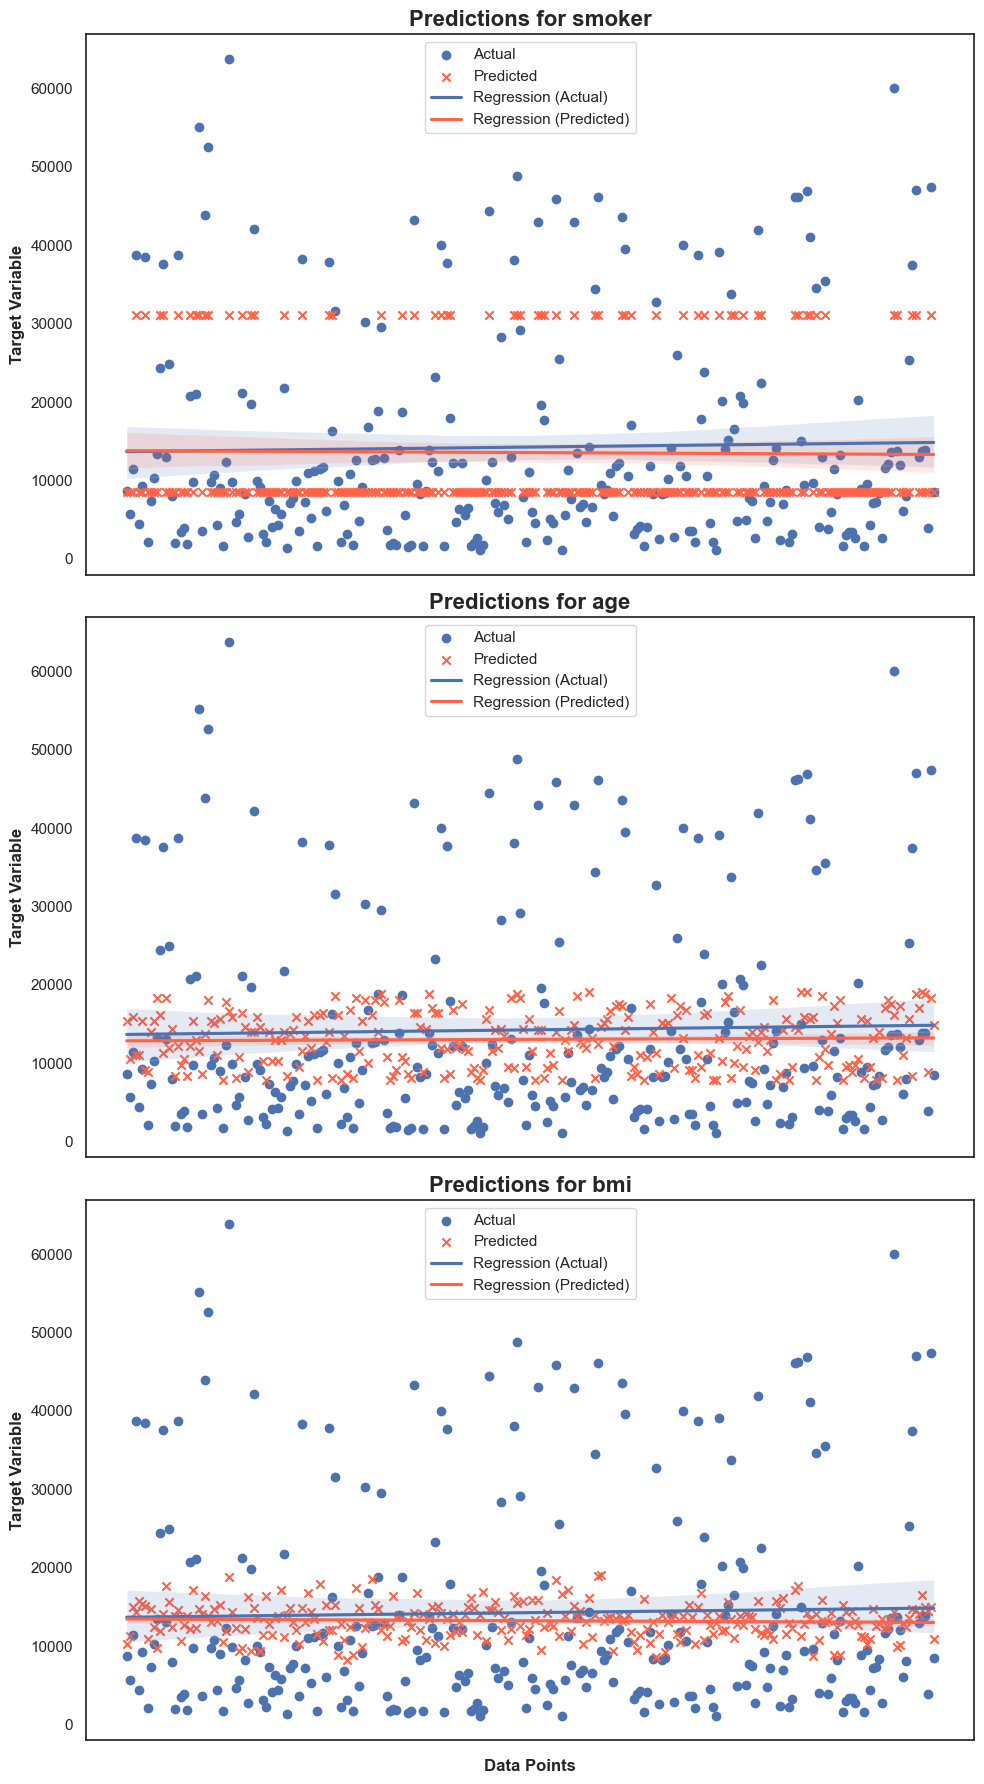

In [51]:
# Set a custom color palette for the actual and predicted data points
actual_color = 'b'
predicted_color = 'tomato'

# Create a subplot grid to plot the predictions for each predictor
fig, axs = plt.subplots(len(predictors), 1, figsize=(10, 6 * len(predictors)), sharex=True)

# Loop through each predictor and its corresponding trained model
for i, (predictor, model) in enumerate(models.items()):
    # Make predictions on the test data using the current model
    y_pred = model.predict(X_test[[predictor]])
    
    # Create a 1D NumPy array representing the x-axis data points (data point indices)
    x_values = np.arange(len(y_test))
    
    # Plot the actual test data with circles
    axs[i].scatter(x_values, y_test, label='Actual', color=actual_color, marker='o')
    
    # Plot the predicted values with crosses
    axs[i].scatter(x_values, y_pred, label='Predicted', color=predicted_color, marker='x')
    
    # Add regression lines to show the overall trend
    sns.regplot(x=x_values, y=y_test, scatter=False, label='Regression (Actual)', color=actual_color, ax=axs[i])
    sns.regplot(x=x_values, y=y_pred, scatter=False, label='Regression (Predicted)', color=predicted_color, ax=axs[i])
    
    # Set subplot title and labels
    axs[i].set_title(f'Predictions for {predictor}', fontsize=16, fontweight='bold')
    axs[i].set_ylabel('Target Variable', fontsize=12, fontweight='bold')
    axs[i].legend()
    
    # Remove the x-axis tick labels for all subplots except the last one to avoid overlapping
    if i < len(predictors) - 1:
        axs[i].set_xticklabels([])
        
# Add a common x-axis label
plt.xlabel('Data Points', fontsize=12, fontweight='bold')

# Adjust the layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### Visualise all 3 model predictions together alonmg with the actual values for closer visual comparison 

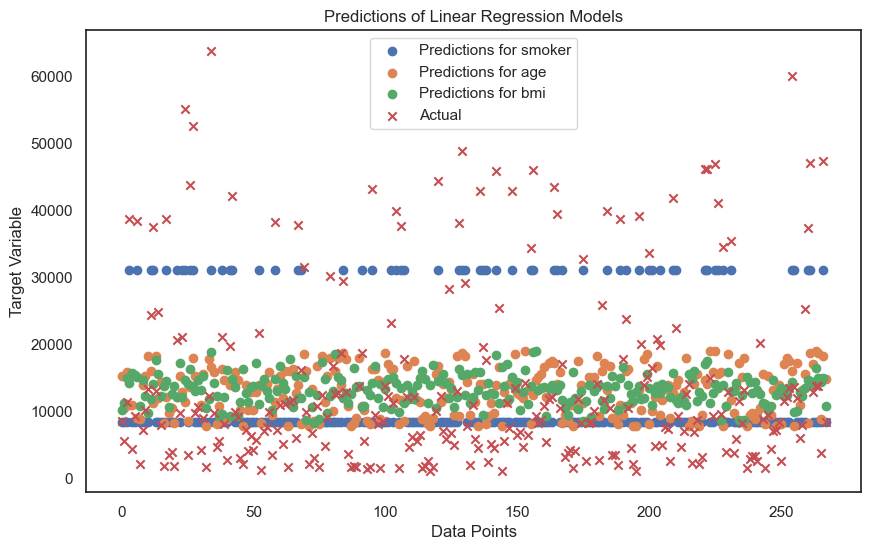

In [52]:
# Create a single matplotlib figure
plt.figure(figsize=(10, 6))

# Loop through each predictor and its corresponding trained model
for predictor, model in models.items():
    # Make predictions on the test data using the current model
    y_pred = model.predict(X_test[[predictor]])
    
    # Plot the predicted values as a scatter plot
    plt.scatter(range(len(y_test)), y_pred, label=f'Predictions for {predictor}', marker='o')

# Plot the actual test data as blue markers
plt.scatter(range(len(y_test)), y_test, label='Actual', color='r', marker='x')

# Set plot title and labels
plt.title('Predictions of Linear Regression Models')
plt.xlabel('Data Points')
plt.ylabel('Target Variable')
plt.legend()

# Show the plot
plt.show()

From the results, it's evident that the "Smoker" model performs significantly better than the other two models (Age and BMI). It has the lowest Mean Squared Error (MSE), the lowest Mean Absolute Error (MAE), and the highest R-squared (R2) value, which indicates that it explains a considerable portion of the variance in the medical cost, which is also evident in the plot.

The "Age" model has a relatively higher R-squared value than the "BMI" model, but both models show lower performance compared to the "Smoker" model.

Overall, while the "Smoker" model appears to be the best performer among the three individual predictor models, the R-squared values are still relatively low. This may indicate that a single predictor alone may not be sufficient to capture the complexities of the relationship between predictors and the target variable.
Hence a multivariate regression model that considers multiple predictors together might provide a better overall performance.

### Multivariate Regression Model - Top 3 predictors

In [53]:
# Separate predictors and target variable
X = df_feng_encoded[['smoker', 'age', 'bmi']]
y = df_feng_encoded['medical_cost']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the multivariate linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
multivariate_3 = y_pred

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 35841574.82
Mean Absolute Error (MAE): 4191.70
Root Mean Squared Error (RMSE): 5986.78
R-squared (R2): 0.80


Comparing the metrics of this model with the  individual predictor models, we can observe the following:

The MSE, MAE, and RMSE of the multivariate regression model are considerably lower than those of the individual predictor models (Smoker, Age, BMI). Lower values indicate that the multivariate model's predictions are closer to the actual values, implying better performance in predicting medical costs.

The R-squared (R2) of the multivariate regression model (0.80) is substantially higher than the individual predictor models. The higher R2 indicates that the multivariate model explains a larger proportion of the variance in the medical costs, suggesting that it fits the data better.

Overall, the multivariate regression model using 'smoker', 'age', and 'bmi' as predictors outperforms the individual predictor models in terms of MSE, MAE, RMSE, and R-squared (R2). This suggests that incorporating all three predictors simultaneously leads to a more accurate and robust model. 

Next, we will build a multivariate regression modell with all the predictors in the dataset.

### Multivariate Regression Model - All Predictors

In [54]:
df = df_feng_encoded.copy()

# Drop non-numeric columns
df.drop(['region', 'bmi_category'], axis=1, inplace=True)

df.head()

,age,gender,bmi,children,smoker,bmi_category_binary,medical_cost
0,19,0,27.900,0,1,10,16884.92400
1,18,1,33.770,1,0,11,1725.55230
2,28,1,33.000,3,0,11,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,10,3866.85520


In [55]:
# Separate predictors and target variable
X = df.drop('medical_cost', axis=1)
y = df['medical_cost']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the multivariate linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
multivariate_all = y_pred

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 35920695.91
Mean Absolute Error (MAE): 4251.70
Root Mean Squared Error (RMSE): 5993.39
R-squared (R2): 0.80


####  Visualise predictions of both multivariate models

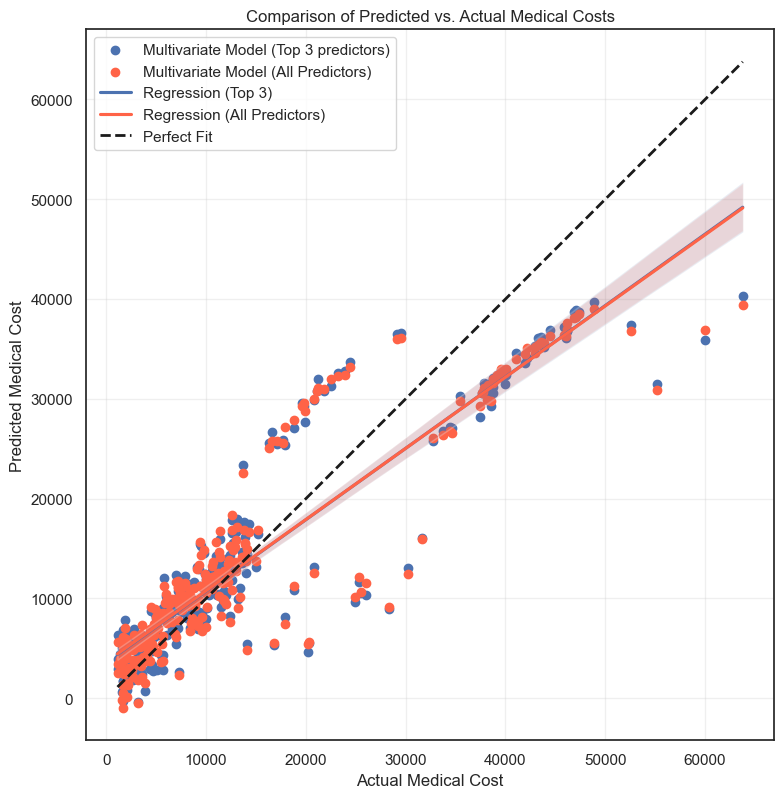

In [56]:
# Set a custom color palette for the actual and predicted data points
model_1 = 'b'
model_2 = 'tomato'

# Create a new figure and adjust the style
plt.figure(figsize=(8, 10))

# Scatter plot for the individual predictor model ('smoker', 'age', 'bmi')
plt.scatter(y_test, multivariate_3, label='Multivariate Model (Top 3 predictors)', marker='o', color=model_1)

# Scatter plot for the multivariate model with all predictors
plt.scatter(y_test, multivariate_all, label='Multivariate Model (All Predictors)', marker='o', color=model_2)

# Add regression lines to show the overall trend
sns.regplot(x=y_test, y=multivariate_3, scatter=False, label='Regression (Top 3)', color=model_1)
sns.regplot(x=y_test, y=multivariate_all, scatter=False, label='Regression (All Predictors)', color=model_2)

# Add a diagonal line for reference (the perfect fit line)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Perfect Fit')

# Add labels for the x and y-axes
plt.xlabel('Actual Medical Cost')
plt.ylabel('Predicted Medical Cost')

# Add a title to the plot
plt.title('Comparison of Predicted vs. Actual Medical Costs')

# Move the legend to a better location
plt.legend(loc='upper left')

# Set equal aspect ratio for a 45-degree diagonal perfect fit line
plt.gca().set_aspect('equal', adjustable='box')

# Show grid lines for better visualization
plt.grid(True, alpha=0.3)

# Display the plot
plt.tight_layout()
plt.show()

Based on our results of our accuraccy metrics and the prediction plots, we can observe similar performance between our multivariate model with all predictors and the previous multivariate model that using only the top three predictors 'smoker', 'age', and 'bmi'.

Both models have similar MSE, MAE, RMSE, and R-squared values. This suggests that adding the additional predictors (gender, children, region, and bmi_category) to the model does not significantly improve or degrade the model's predictive capabilities.

Since the R-squared value is 0.80, it indicates that approximately 80% of the variance in the medical costs can be explained by the model, which is a good fit. The RMSE and MAE values are also relatively low, indicating that the model's predictions are close to the actual values on average.

Overall, both models seem to be performing well, and the choice of using either the three predictors or all predictors can depend on other considerations, such as model complexity, interpretability, and the need for additional features in specific use cases.